# Lab 2:  Problem 3

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
css_styling()

We will now use Newton's method to find the roots to a *complex* function, namely the function
    $$f_C(z) = z^3 - 1.$$
### a)
Write the complex function $f_C: \mathbb{C} \to \mathbb{C}$ as a real vector-valued function $\mathbf{f}: \mathbb{R}^2 \to \mathbb{R}^2$ and write down the Jacobian.  
(*Hint: use rectangular coordinates $z = x_1+\mathrm{i}x_2$)*

<font color='blue'>
    
   Solution:
    
   Written as a real vector-valued function using j and k as notation for real and imaginary dimensions respectively:
    
   f = $(x_1*j + x_2*k)^3 -1 $
   
   -> f = $(x_1^3 - 3x_1x_2^2 -1)*j + (-x_2^3 + 3x_2x_1^2)*k$
   
   Jacobian matrix: $[(3x_1^2 - 3x_2^2),(-6x_1x_2) ; (6x_1x_2),(3x_1^2 - 3x_2^2)]$
    
   Jacobian: $J = 9x_1^4+9x_2^4-6x_1^2x_2^2$

</font>

### b)
Write a function $\texttt{Newton}$ which performs Newton iteration until $\|\mathbf{f}(\mathbf{x}^k)\|_p$ is smaller than some given tolerance $tol$. You can choose what $p$-norm $\|\cdot\|_p$ you use. The function should take as input parameters  
 - Initial guess $\mathbf{x}^{(0)}$
 - tolerance $tol$
 - Maximum number of iterations $itermax$.  

The function should return the final iterate $\mathbf{x}^{(k)}$, and some indication of whether the iteration converged. 

In [81]:
# As alway we start by importing the important libraries.
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def Newton(x0, tol, itermax):
    #initializing the iterate-matrix
    x = np.zeros((itermax+1,2))
    x[0,0] = x0[0] + 0.0001
    x[0,1] = x0[1] + 0.0001
    converged = False
    i = 0
    while i < itermax:
        #calculating the values of the vector function f:
        f = np.array([x[i,0]**3-3*x[i,0]*x[i,1]**2-1, -x[i,1]**3+3*x[i,1]*x[i,0]**2])
        #calculateing the jacobian matrix:
        j = np.array([[3*(x[i,0]**2-x[i,1]**2),-6*x[i,0]*x[i,1]],
                     [6*x[i,0]*x[i,1],3*x[i,0]**2-3*x[i,1]**2]])
        #calculating the jacobian(determinant of jacobian matrix):
        Jac = j[0,0]*j[1,1]-j[0,1]*j[1,0]
        #solving the linear system j*h(i) = -f(x(i)) wrt. h
        h = ((-np.array([[j[1,1],-j[0,1]],[-j[1,0],j[0,0]]])).dot(f))/Jac
        #iterating, setting x(i+1) = x(i) + h(i):
        x[i+1,0]=x[i,0]+h[0]
        x[i+1,1]=x[i,1]+h[1]
        xk = np.array([x[i+1,0],x[i+1,1]])
        #checking for convergence:
        residual = la.norm(f)
        if residual < tol:
            converged = True
            break;
        i+=1
        
    arg = np.around(np.arctan2(xk[1],xk[0]), decimals=2)
    #if converged:
    #    print("The iteration converged after %2d iterations" %(i))
    #else:
    #    print("The iteration did not converge")
              
    return xk, converged, arg


#a = np.array([0.1,-0.9])
#b = 0.05
#c = 10
#Answer,convergence, argument = Newton(a,b,c)

### c)
The function $\mathbf{f}$ has exactly three roots. (Which?) Hence, if the iteration converges it might converge to any of the three roots. You will now study the dependence on initial guess to which root the iteration converges. Pick $N$ equidistant values of $x^{(0)}_1$ in the interval $[-1,1]$ and $N$ equidistant values of $x^{(0)}_2$ in the interval $[-1,1]$. For each point $\mathbf{x}^{(0)} = (x^{(0)}_1, x^{(0)}_2)^T$, perform the newton iteration you have defined above. Give the point a color depending on whether the iteration converged in time. If the iteration converged, the point should get a different color depending on which point it converged to. Plot the result.

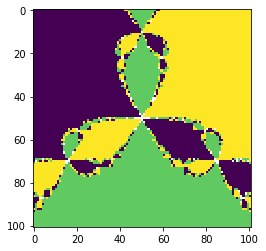

In [84]:
#Write code here
# The three roots are: z1=1, z2=-0.5+(sqrt(3)/2)i 
# z3=-0.5-(sqrt(3)/2)i 

N=101
a = np.linspace(-1,1,N)
b = np.linspace(-1,1,N)
x = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        c = np.array([a[i],b[j]])
        d,e,arg = Newton(c,0.01,20)
        x[i,j] = arg
        if e == False:
            x[i,j] = None
            j+=1
            continue;
        if arg>-0.1 and arg<0.1:
            x[i,j] = 1
        elif arg>((np.pi*2/3)-0.1) and arg<((np.pi*2/3)+0.1):
            x[i,j] = 2
        elif arg<((-np.pi*4/3)-0.1) and arg>((np.pi*4/3)+0.1):
            x[i,j] = 3
        j+=1
    i+=1


plt.imshow(x)

*Hint 1: You will encounter an error if you try with the initial guess $\mathbf{x}^{(0)} = \mathbf{0}$. It might be good to offset all initial guesses by some small perturbation $\mathbf{\delta}$.*     

*Hint 2: A good way to measure which root the iteration converged to is looking at the argument if the point as a complex number, that is $$\arg(x^{(k)}_1 + \mathrm{i}x^{(k)}_2).$$ Store the result in a $N\times N$ array. If the iteration did not converge, the point can be given the value* **None**. *The result can then be plotted using the matplotlib.pyplot function $\texttt{imshow}$.*

### d)
Discuss the following: Does it matter what $p$-norm you use in your Newton algorithm? What happens if you change norm? Does the result change qualitively? Remember that the $p$-norm on $\mathbb{R}^n$  is defined as
$$
\|\mathbf{x}\|_p := \left(\sum_{k=1}^n|x_k|^p\right)^{1/p}
$$
for $1<p<\infty$.

<font color='blue'>
    
   Solution: Different p-norms will compute slightly different measurements of the size of f, however they are all decent measurements. The p-norm varies from the taxicab norm with p=1, to the infinite norm with p = inf. The taxicab norm will give the largest f, and thus the strictest convergence control. However the other norms also work fine. The result will not change qualitatively for the different p-norms.
   
</font>

### e) (Not mandatory)
Modify your Newton function so that it returns the number of iterations used. Then, plot the number of iterations used for each initial guess $\mathbf{x}^{(0)}.$ What do you observe?

In [1]:
#Write code here

### Remark
If you colored the plot according to the hint, the white parts are called the *Julia set* of the rational function $$Q(z) = z - \frac{f_C(z)}{f_C'(z)}.$$ The colored parts are called *Fatou components.* If you would like to more about the plot above and others like it, there is a link to the wikipedia page of [Julia sets](https://en.wikipedia.org/wiki/Julia_set).